In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import matplotlib.pyplot as plt
import math

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data/r_cross_val.csv')
df.date = pd.to_datetime(df.date)
df

,date,close,forecast
0,2020-05-20,185.660004,185.660004
1,2020-05-21,183.429993,185.751586
2,2020-05-22,183.509995,183.617777
3,2020-05-26,181.570007,183.701864
4,2020-05-27,181.809998,181.831493
...,...,...,...
249,2021-05-17,245.179993,248.482677
250,2021-05-18,243.080002,245.620979
251,2021-05-19,243.119995,243.580506
252,2021-05-20,246.479996,243.591892


# Plotting

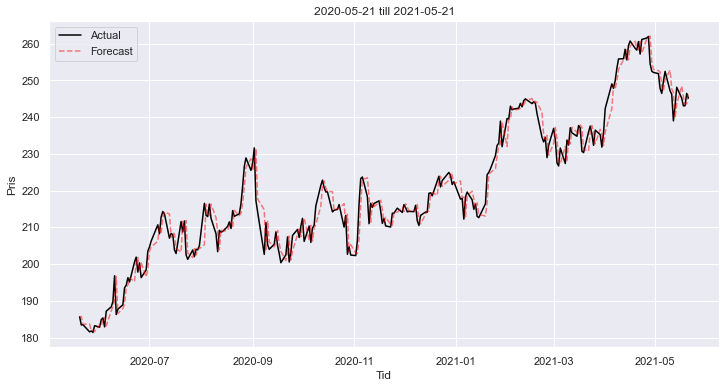

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label="Actual", color="black")
plt.plot(df['date'], df['forecast'], label="Forecast", color="red", alpha=0.5, linestyle="--")
plt.xlabel('Tid')
plt.ylabel('Aktiepris')
plt.title('2020-05-21 till 2021-05-21') 
plt.legend()

# Trading

In [4]:
# Setup
last_training = df['close'].values[0]
df = df.iloc[1:] # removing first row as it's training data
periods = len(df)

bank_start = 3000
bank = bank_start

risk_max = 0.25
last_close = df['close'].iloc[-1]

portfolio_array = []

In [5]:
# Simulating trading

stock_count = 0
nr_buys = 0
nr_sells = 0

for row, values in df.iterrows():
    
    latest_close = last_training if row < 1 else df['close'].iloc[row-1]
    forecast = df['forecast'].iloc[row] if row < 253 else latest_close
    expected = forecast - latest_close

    portfolio = stock_count*latest_close
    total_value = portfolio + bank
    portfolio_array.append(total_value)

    max_to_trade = math.floor(total_value * risk_max / latest_close)
    nr_to_buy = max_to_trade if max_to_trade * latest_close < bank else math.floor(bank / latest_close)
    nr_to_sell = max_to_trade if max_to_trade < stock_count else stock_count
        
    if expected > 0:
        bank -= latest_close * nr_to_buy
        stock_count += nr_to_buy
        nr_buys += nr_to_buy
    
    if expected < 0:
        bank += latest_close * nr_to_sell
        stock_count -= nr_to_sell
        nr_sells += nr_to_sell
    
    if row == periods and stock_count > 0: # if last period and holding stocks, sell everything and skip
        bank += latest_close * stock_count
        nr_sells += stock_count

print(f'Trading yield: {round(bank/bank_start*100 - 100, 2)}%')
print(f'Index yield: {round((last_close-last_training)/last_training*100, 2)}%')

Trading yield: 37.28%
Index yield: 32.05%


Trading yield: 37.28%
Index yield: 32.05%


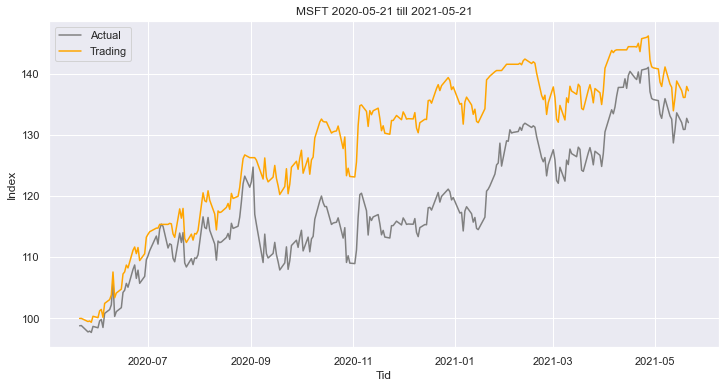

In [6]:
df['total_value'] = portfolio_array
df['yield_index'] = 100*(df['close']/last_training - 1) + 100
df['yield_trade'] = 100*(df['total_value']/bank_start - 1) + 100

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['yield_index'], label="Actual", color="gray")
plt.plot(df['date'], df['yield_trade'], label="Trading", color="orange")
plt.xlabel('Tid')
plt.ylabel('Index (start = 100)')
plt.title('2020-05-21 till 2021-05-21')
plt.legend()

print(f'Trading yield: {round(bank/bank_start*100 - 100, 2)}%')
print(f'Index yield: {round((last_close-last_training)/last_training*100, 2)}%')